In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Dataset

df = pd.read_csv('dataset_ass7.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
df.isnull().any()


Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [9]:
df.fillna(0,inplace =True)

In [10]:
df.isnull().any() # no null values

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [11]:
df.drop(['EmployeeCount','EmployeeID','StandardHours', 'Over18'],axis=1,inplace=True) # removing useless features

In [12]:
df.head() # unnecessary features removed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [13]:
use_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [14]:
#Convert all the Categorical data into numerical data
# get unique values from each categorical feature
print(df['BusinessTravel'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['Department'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [15]:
# sklearn used to convert data to numerical
from sklearn.preprocessing import LabelEncoder
cat_x = LabelEncoder()

df['BusinessTravel'] = cat_x.fit_transform(df['BusinessTravel'])
df['Department'] = cat_x.fit_transform(df['Department'])
df['EducationField'] = cat_x.fit_transform(df['EducationField'])
df['Gender'] = cat_x.fit_transform(df['Gender'])
df['JobRole'] = cat_x.fit_transform(df['JobRole'])
df['MaritalStatus'] = cat_x.fit_transform(df['MaritalStatus'])


In [16]:
# Attrition is dependent feature so put on y axis
from sklearn.preprocessing import LabelEncoder
cat_y = LabelEncoder()
df['Attrition'] = cat_y.fit_transform(df['Attrition'])

In [17]:
# checking categorical values again it's changed to numerical
# No = 0, Yes = 1
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [18]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

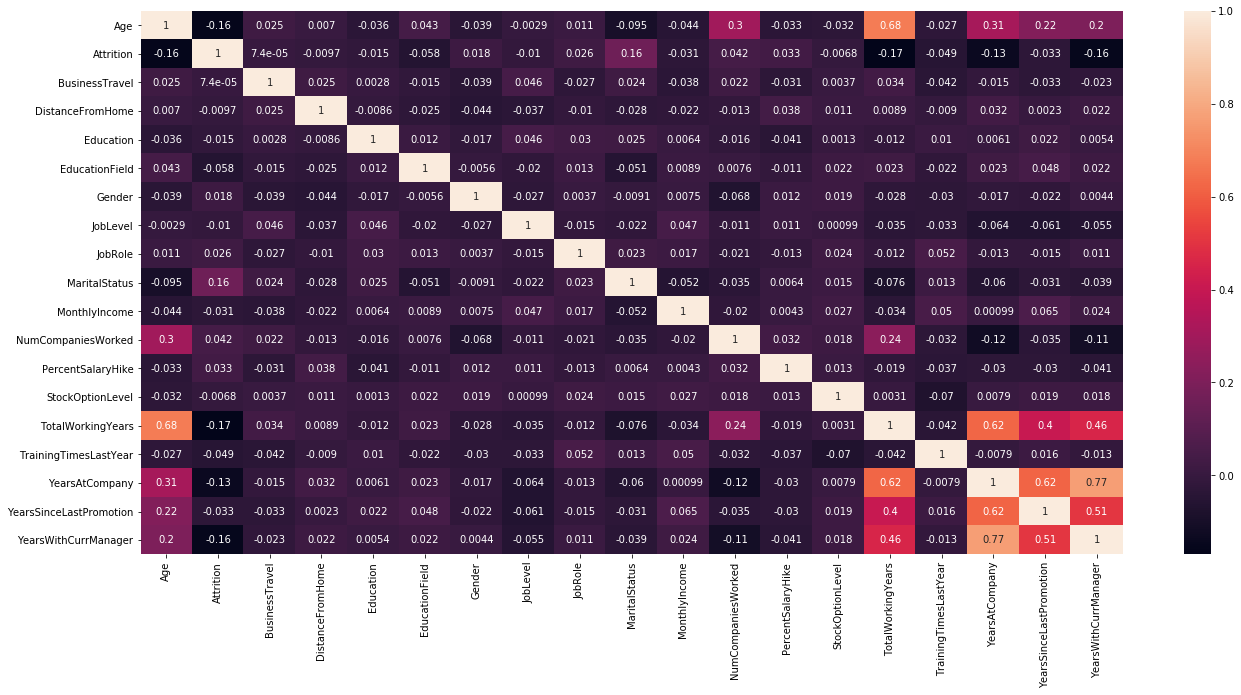

In [19]:
plt.figure(figsize = (22, 10))
sns.heatmap(corr_cols.corr(), annot = True)

In [28]:
# Function to check Accepting or Rejecting Null Hypothesis
def check(Attrition, b, c):
    print('\nNull Hypothesis: There is no Significant Correlation between Attrition and', b)
    print('Alternate Hypothesis: There is Significant Correlation between Attrition and', b)
    from scipy.stats import pearsonr
    stats, p = pearsonr(df.Attrition, c)
    print('\nCorrelation:', stats, 'P Value:', p,'\n')
    if p < 0.05:
        print('P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis')
        if stats > 0:
            print('There is Positive Correlation between Attrition and', b)
        else:
            print('There is Negative Correlation between Attrition and', b)
    else:
        print("P-Value >= 0.05 hence Null hypothesis is Accepted")
        print('There is no Significant Correlation between Attrition and', b)
    print('-----------------------------------------------------------------------------------------------------------------')
    

In [29]:
check('Attrition', 'Age', df.Age)
check('Attrition', 'BusinessTravel', df.BusinessTravel)
check('Attrition', 'DistanceFromHome', df.DistanceFromHome)
check('Attrition', 'Education', df.Education)
check('Attrition', 'EducationField', df.EducationField)
check('Attrition', 'Gender', df.Gender)
check('Attrition', 'JobLevel', df.JobLevel)
check('Attrition', 'JobRole', df.JobRole)
check('Attrition', 'MaritalStatus', df.MaritalStatus)
check('Attrition', 'MonthlyIncome', df.MonthlyIncome)
check('Attrition', 'NumCompaniesWorked', df.NumCompaniesWorked)
check('Attrition', 'PercentSalaryHike', df.PercentSalaryHike)
check('Attrition', 'StockOptionLevel', df.StockOptionLevel)
check('Attrition', 'TotalWorkingYears', df.TotalWorkingYears)
check('Attrition', 'TrainingTimesLastYear', df.TrainingTimesLastYear)
check('Attrition', 'YearsAtCompany', df.YearsAtCompany)
check('Attrition', 'YearsSinceLastPromotion', df.YearsSinceLastPromotion)
check('Attrition', 'YearsWithCurrManager', df.YearsWithCurrManager)


Null Hypothesis: There is no Significant Correlation between Attrition and Age
Alternate Hypothesis: There is Significant Correlation between Attrition and Age

Correlation: -0.15920500686577965 P Value: 1.996801615886744e-26 

P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis
There is Negative Correlation between Attrition and Age
-----------------------------------------------------------------------------------------------------------------

Null Hypothesis: There is no Significant Correlation between Attrition and BusinessTravel
Alternate Hypothesis: There is Significant Correlation between Attrition and BusinessTravel

Correlation: 7.377694602225034e-05 P Value: 0.9960919945437704 

P-Value >= 0.05 hence Null hypothesis is Accepted
There is no Significant Correlation between Attrition and BusinessTravel
-----------------------------------------------------------------------------------------------------------------

Null Hypothesis: There is no Sign

In [33]:
# Correlation of all columns with Attrition
df.corr().iloc[:, 1:2].drop('Attrition', axis= 0)

,Attrition
Age,-0.159205
BusinessTravel,0.000074
Department,-0.048206
DistanceFromHome,-0.009730
Education,-0.015111
EducationField,-0.057940
Gender,0.018125
JobLevel,-0.010290
JobRole,0.025809
MaritalStatus,0.162070
